In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading the Data
data = pd.read_csv('/Users/Abhi/Downloads/house_price.csv')
print(data.shape)
data.head()

(1000, 7)


,Location,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
0,Bommanahalli,3,1,3000,1,3,28000
1,Bommanahalli,3,1,1650,10,0,18000
2,Whitefield,2,0,1000,5,3,16400
3,Whitefield,3,0,1600,1,9,27000
4,Whitefield,2,1,1200,5,1,20000


In [3]:
#Checking if there is any missing values in the dataset
data.isnull().sum()

Location      0
BHK           0
Furnishing    0
Sq.ft         0
Old(years)    0
Floor         0
Price         0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Location    1000 non-null   object
 1   BHK         1000 non-null   int64 
 2   Furnishing  1000 non-null   int64 
 3   Sq.ft       1000 non-null   int64 
 4   Old(years)  1000 non-null   int64 
 5   Floor       1000 non-null   int64 
 6   Price       1000 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 54.8+ KB


In [5]:
{column: len(data[column].unique()) for column in data.columns}

{'Location': 2,
 'BHK': 2,
 'Furnishing': 2,
 'Sq.ft': 41,
 'Old(years)': 3,
 'Floor': 12,
 'Price': 26}

In [6]:
data.describe()

,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.436000,0.348000,1448.613000,4.029000,3.465000,22829.900000
std,0.496135,0.476574,491.272535,3.048845,3.245197,7706.410627
min,2.000000,0.000000,767.000000,1.000000,0.000000,11000.000000
25%,2.000000,0.000000,1089.000000,1.000000,1.000000,16500.000000
50%,2.000000,0.000000,1300.000000,5.000000,3.000000,21000.000000
75%,3.000000,1.000000,1650.000000,5.000000,3.000000,26000.000000
max,3.000000,1.000000,3155.000000,10.000000,13.000000,45000.000000


In [7]:
data.groupby('Location')['Location'].agg('count')

Location
Bommanahalli    504
Whitefield      496
Name: Location, dtype: int64

<AxesSubplot:xlabel='Location', ylabel='count'>

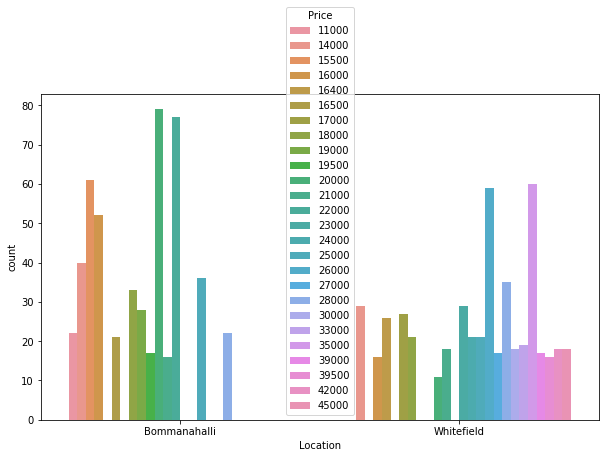

In [8]:
plt.figure(figsize = (10, 6))
sns.countplot(x = 'Location', hue = 'Price', data = data)

<AxesSubplot:>

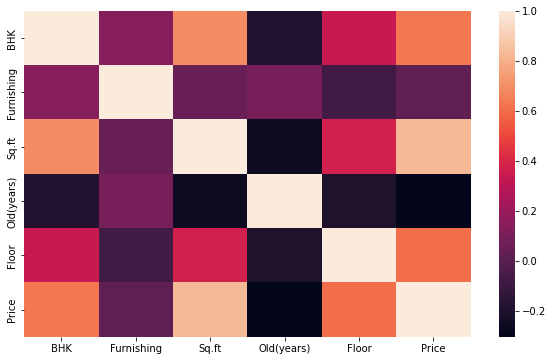

In [9]:
#Visualizing the correlation between price and other factors
plt.figure(figsize = (10, 6))
sns.heatmap(data.corr())

<AxesSubplot:xlabel='Old(years)', ylabel='count'>

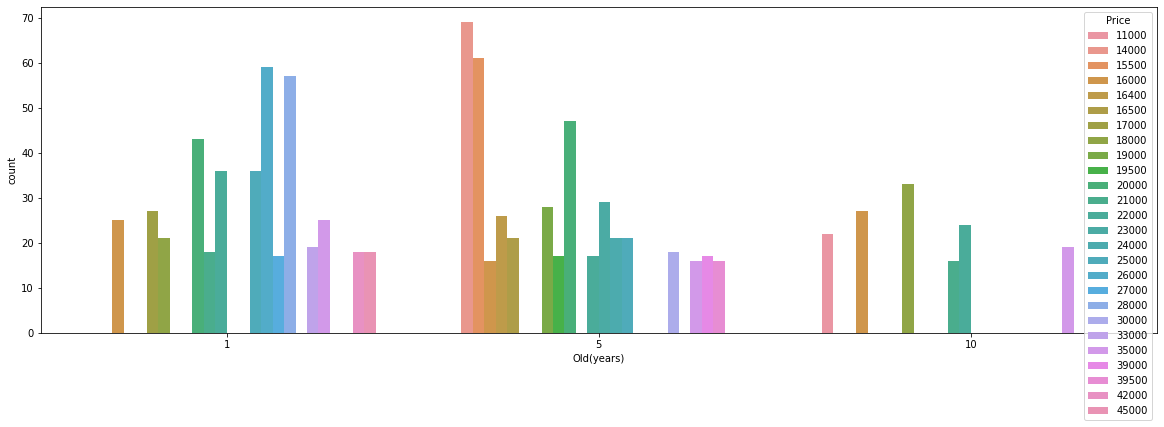

In [10]:
plt.figure(figsize = (20, 6))
sns.countplot(x = 'Old(years)', hue = 'Price', data = data)

In [11]:
#Dropping the 'Old(years)' column because it hardly effect the price as shown in correlation graph
data.drop(['Old(years)'], axis = 1)

,Location,BHK,Furnishing,Sq.ft,Floor,Price
0,Bommanahalli,3,1,3000,3,28000
1,Bommanahalli,3,1,1650,0,18000
2,Whitefield,2,0,1000,3,16400
3,Whitefield,3,0,1600,9,27000
4,Whitefield,2,1,1200,1,20000
...,...,...,...,...,...,...
995,Bommanahalli,3,1,1460,2,25000
996,Whitefield,3,0,2100,7,28000
997,Bommanahalli,2,0,1033,0,16500
998,Bommanahalli,3,0,1500,1,22000


In [12]:
#Transforming the non-numerical column in numerical column
from sklearn.preprocessing import LabelEncoder
for column in data.columns:
    if data[column].dtype != (np.int64 or np.float64):
        data[column] = LabelEncoder().fit_transform(data[column])
data.head()

,Location,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
0,0,3,1,3000,1,3,28000
1,0,3,1,1650,10,0,18000
2,1,2,0,1000,5,3,16400
3,1,3,0,1600,1,9,27000
4,1,2,1,1200,5,1,20000


In [13]:
#Initializing the independent factors with X and dependent factor('Price') with y
X = data.drop(['Price'], axis = 1)
y = data['Price']

In [14]:
#Spilting the dataset into two parts (training data and testing data with 70% and 30% respectively)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
reg = LinearRegression().fit(X_train, y_train)

In [15]:
#Checking the accuracy by compairing, what the prediction values of y we get from this model to actual values of y
from sklearn.metrics import r2_score
r2_score(y_test, reg.predict(X_test))

0.8529203286456308

In [16]:
import pickle
with open('AbhishekPandey_6Week_FinalProject_house_price_(Linear_Regression)', 'wb') as file:
    pickle.dump(reg, file)